# Visualizing Data

## Import Library

Library pada bahasa pemrograman Python berfungsi untuk memudahkan pengguna dalam membuat sebuah program tanpa harus menuliskan banyak kode. Untuk memvisualisasikan sebuah data pada Phyton, dibutuhkan beberapa library diantaranya Pandas, NumPy, Matplotlib, Wordcloud, dan Folium. Library tersebut harus diimport terlebih dahulu agar dapat digunakan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud
import folium

Setelah library yang dibutuhkan sudah diimport, selanjutnya akan dilakukan import data.

## Import Data

Data yang digunakan pada kasus ini adalah data London Crime Dataset yang diperoleh dari situs Kaggle. Set data berisikan catatan kejahatan di wilayah metropolitan utama seperti Kota London. Set data dihimpun dari Januari 2008 hingga Desember 2016. Variabel-variabel pada set data adalah:
* lsoa_code      : area kepolisian
* borough        : wilayah di London
* major_category : kategori kejahatan mayor
* minor_category : kategori kejahatan minor
* value          : jumlah kejahatan di wilayah tertentu pada bulan tertentu
* year           : tahun
* month          : bulan

Set data diimport menggunakan fungsi pd.read_csv karena file yang digunakan memiliki format .csv dan disimpan dalam dataframe bernama london_crimes.

In [2]:
london_crimes = pd.read_csv(r'C:\Users\USER\MBKM\sesi\london_crime_by_lsoa.csv')

## Information from Data

Karena set data yang digunakan memiliki jumlah yang besar, maka dapat digunakan fungsi head() untuk melihat sebagian dari data. Untuk melihat 20 data teratas dari set data, digunakan fungsi london_crimes.head(20)

In [3]:
london_crimes.head(20)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


Jumlah kolom, tipe data pada setiap kolom, jumlah baris pada set data dapat diketahui dengan menggunakan kode .info()

In [4]:
london_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Untuk mengetahui shape dari set data dapat digunakan kode .shape

In [5]:
london_crimes.shape

(13490604, 7)

## Missing Values Check

Setelah data berhasil diimport, selanjutnya dilakukan pengecekan missing values pada data menggunakan fungsi .isna().sum()

In [6]:
london_crimes.isna().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Tidak ditemukan missing values pada data.

## Visualization

Visualisasi data adalah proses menampilkan atau menyajikan data ke dalam bentuk visual (dapat berupa bagan, grafik, dan lain-lain) agar mudah dipahami. Visualisasi data dapat berfungsi untuk mengidentifikasi pola dan tren dari sebuah data, membuat data menjadi mudah dipahami, memberikan informasi/insigt, dan dapat digunakan dalam proses pengambilan keputusan.

Sebuah data dapat divisualisasikan dengan berbagai cara, umumnya visualisasi data yang digunakan adalah Chart yang terdiri dari Line Charts, Pie Chart, dan lain-lain. Pada kasus ini, digunakan beberapa jenis visualisasi diantaranya Line Chart, Area Plot, Histogram, Bar Chart, Box Plot, Scatter Plot, Word Clouds, dan Folium Maps.

### Line Chart

Line chart atau diagram/grafik garis adalah salah satu bentuk dari visualisasi data yang dapat digunakan untuk mengetahui perubahan kondisi dari waktu ke waktu. Line chart berbentuk garis naik dan turun yang menghubungkan titik-titik penting pada data. 

#### Case 1

Menggunakan line chart, ingin diketahui pada tahun berapa kasus kejahatan tertinggi dan terendah terjadi di kota London pada tahun 2008 - 2016.

Untuk dapat menjawab permasalahan tersebut, data perlu dikelompokkan berdasarkan tahun terlebih dahulu. Digunakan kode .groupby('years') untuk mengelompokkan data berdasarkan kolom years dan kode .sum() untuk menjumlahkan seluruh kasus yang terjadi setiap tahunnya pada setiap wilayah.

In [7]:
london_crimes_years = london_crimes.groupby('year').sum()
london_crimes_years

,value,month
year,,
2008,738641,9743214
2009,717214,9743214
2010,715324,9743214
2011,724915,9743214
2012,737329,9743214
2013,686407,9743214
2014,680183,9743214
2015,711624,9743214
2016,736121,9743214


Karena kolom month tidak diperlukan, maka dilakukan drop kolom/hapus kolom menggunakan kode .drop('month',axis=1). Kode axis=1 menandakan akan terjadi drop kolom month secara keseluruhan.

In [8]:
london_crimes_years = london_crimes_years.drop('month', axis =1)
london_crimes_years

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


Setelah kolom month dihapus, langkah selanjutnya adalah membuat line chart menggunakan kode .plot() dengan rincian sebagai berikut:
* kind=''  : digunakan untuk mendefinsikan atau menentukan jenis chat yang akan digunakan, pada kasus ini **line**
* color='' : digunakan untuk memberikan warna tertentu pada chart
* figsize=() : digunakan untuk mengatur ukuran dari chart

Selain itu, chart dapat diberikan informasi tambahan berupa judul dan nama/keterangan masing-masing sumbu.

* plt.title() : digunakan untuk menambahkan judul chart
* plt.ylabel() : digunakan untuk memberikan nama/keterangan pada sumbu Y
* plt.xlabel() : digunakan untuk memberikan nama/keterangan pada sumbu X
* fontsize : digunakan untuk mengatur ukuran teks
* plt.show() : digunakan untuk menampilkan informasi tambahan

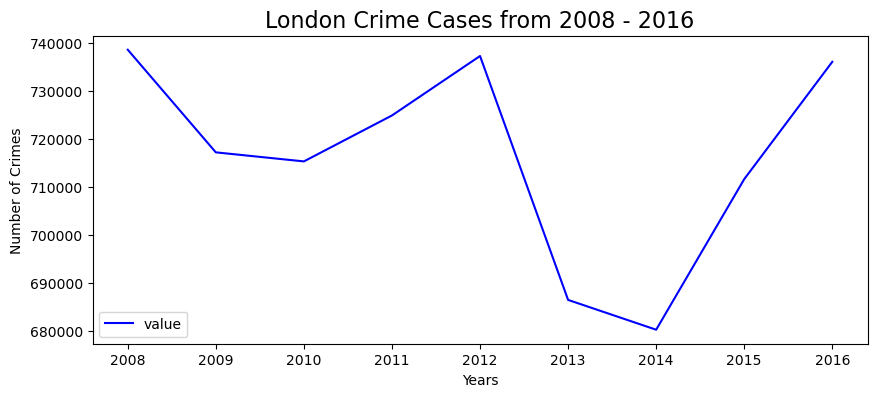

In [9]:
london_crimes_years.plot(kind='line', color='blue', figsize=(10,4))
plt.title('London Crime Cases from 2008 - 2016',fontsize=(16))
plt.ylabel('Number of Crimes')
plt.xlabel('Years')
plt.show()

**Interpretasi:**

Berdasarkan line chart London Crime Cases from 2008 - 2016, dapat diketahui bahwa kasus kejahatan yang paling banyak terjadi di Kota London dalam jangka waktu 2008 - 2016 adalah 738641 kasus dan terjadi pada tahun 2008. Sedangkan kasus kejahatan yang paling sedikit dalam jangka waktu 2008 - 2016 adalah 680183 kasus dan terjadi pada tahun 2014. Pada tahun 2012, jumlah kasus kejahatan di London menurun, akan tetapi hal ini tidak berlangsung lama karena pada tahun 2014 jumlah kasus kejahatan di London mengalami kenaikan yang cukup signifikan.

#### Case 2

Menggunakan line chart, ingin diketahui pada tahun berapa kasus kejahatan tertinggi dan terendah terjadi di wilayah Sutton pada tahun 2008-2016.

Untuk dapat menjawab permasalahan tersebut, perlu dilakukan preparasi data terlebih dahulu menggunakan slicing berdasarkan borough dengan syarat Sutton.

In [10]:
borough_sutton = london_crimes[london_crimes['borough']=='Sutton']
borough_sutton

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
19,E01004195,Sutton,Drugs,Possession Of Drugs,0,2009,10
79,E01004165,Sutton,Robbery,Personal Property,1,2008,1
97,E01004142,Sutton,Burglary,Burglary in Other Buildings,3,2013,5
101,E01004093,Sutton,Violence Against the Person,Wounding/GBH,0,2016,7
...,...,...,...,...,...,...,...
13490331,E01004115,Sutton,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2009,2
13490364,E01004173,Sutton,Violence Against the Person,Harassment,0,2009,12
13490380,E01004142,Sutton,Violence Against the Person,Common Assault,4,2013,7
13490579,E01004100,Sutton,Drugs,Drug Trafficking,0,2016,12


Data perlu dikelompokkan berdasarkan tahun terlebih dahulu. Digunakan kode .groupby('year') untuk mengelompokkan data berdasarkan kolom years dan kode .sum() untuk menjumlahkan seluruh kasus yang terjadi setiap tahunnya pada wilayah Sutton. Karena kolom month tidak diperlukan, maka dilakukan drop kolom/hapus kolom menggunakan kode .drop('month',axis=1). Kode axis=1 menandakan akan terjadi drop kolom month secara keseluruhan.

In [11]:
borough_sutton = borough_sutton.groupby('year').sum().drop('month', axis=1)
borough_sutton

,value
year,
2008,12943
2009,12240
2010,12032
2011,11068
2012,10948
2013,10057
2014,10443
2015,10598
2016,10658


Setelah kolom month dihapus, langkah selanjutnya adalah membuat line chart menggunakan kode .plot() dengan rincian sebagai berikut:

* kind='' : digunakan untuk mendefinsikan atau menentukan jenis chat yang akan digunakan, pada kasus ini **line**
* color='' : digunakan untuk memberikan warna tertentu pada chart
* figsize=() : digunakan untuk mengatur ukuran dari chart

Selain itu, chart dapat diberikan informasi tambahan berupa judul dan nama/keterangan masing-masing sumbu.

* plt.title() : digunakan untuk menambahkan judul chart
* plt.ylabel() : digunakan untuk memberikan nama/keterangan pada sumbu Y
* plt.xlabel() : digunakan untuk memberikan nama/keterangan pada sumbu X
* fontsize : digunakan untuk mengatur ukuran teks
* plt.show() : digunakan untuk menampilkan informasi tambahan

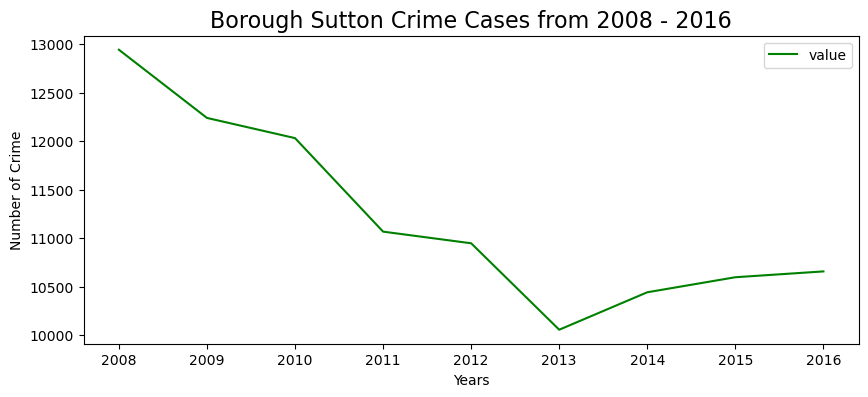

In [12]:
borough_sutton.plot(kind='line', color='green', figsize=(10,4))
plt.title('Borough Sutton Crime Cases from 2008 - 2016',fontsize=(16))
plt.ylabel('Number of Crime')
plt.xlabel('Years')
plt.show()

**Interpretasi:**

Berdasarkan line chart Borough Sutton Crime Cases from 2008 - 2016, dapat diketahui bahwa kasus kejahatan yang paling banyak terjadi di wilayah Sutton dalam jangka waktu 2008 - 2016 adalah 12943 kasus dan terjadi pada tahun 2008. Sedangkan kasus kejahatan yang paling sedikit dalam jangka waktu 2008 - 2016 adalah 10057 kasus dan terjadi pada tahun 2013. Berdasarkan line chart, jumlah kasus kejahatan di wilayah Sutton cenderung menurun dari tahun ke tahun.

### Area Plot

Area plot atau diagram area adalah variasi lain dari line chart. Pada area plot, terdapat area berarsir di bawah garis pada grafik yang menunjukkan volume data yang diwakili oleh garis. Area plot digunakan untuk merepresentasikan total kumulatif data dari waktu ke waktu.

#### Case 3

Menggunakan Area Plot, ingin diketahui perbandingan kasus kejahatan minor kategori Personal Property pada 4 wilayah yaitu Bromley, Hillingdon, Merton, dan Greenwich pada tahun 2008 hingga 2016.

Untuk dapat menjawab permasalahan tersebut, perlu dilakukan preparasi data terlebih dahulu dengan slicing menggunakan .loc berdasarkan kolom borough dengan syarat Bromley dan kolom minor_category dengan syarat Personal Property. Kode groupby.('year').sum() menandakan bahwa data dikelompokkan berdasarkan tahun kemudian seluruh data yang telah dikelompokkan dijumlahkan.

In [13]:
df_bromley = london_crimes.loc[(london_crimes['borough']=='Bromley') & (london_crimes['minor_category']=='Personal Property')].groupby('year').sum()
df_bromley

,value,month
year,,
2008,650,15288
2009,469,15288
2010,507,15288
2011,621,15288
2012,536,15288
2013,505,15288
2014,335,15288
2015,320,15288
2016,331,15288


Kolom month tidak diperlukan, maka dilakukan drop kolom/hapus kolom menggunakan kode .drop('month',axis=1). Kode axis=1 menandakan akan terjadi drop kolom month secara keseluruhan. Untuk mengubah nama kolom, dapat menggunakan kode rename(columns={"value":"Bromley"}) yang berarti mengubah nama kolom **value** menjadi **Bromley**.

In [14]:
crimes_bromley = df_bromley.drop('month',axis=1).rename(columns={"value":"Bromley"})
crimes_bromley

,Bromley
year,
2008,650
2009,469
2010,507
2011,621
2012,536
2013,505
2014,335
2015,320
2016,331


Preparasi data terlebih dahulu dengan cara slicing menggunakan .loc berdasarkan kolom borough dengan syarat Hillingdon dan kolom minor_category dengan syarat Personal Property. Kode groupby.('year').sum() menandakan bahwa data dikelompokkan berdasarkan tahun kemudian seluruh data yang telah dikelompokkan dijumlahkan.

In [15]:
df_hillingdon = london_crimes.loc[(london_crimes['borough']=='Hillingdon') & (london_crimes['minor_category']=='Personal Property')].groupby('year').sum()
df_hillingdon

,value,month
year,,
2008,675,12402
2009,582,12402
2010,686,12402
2011,795,12402
2012,788,12402
2013,506,12402
2014,461,12402
2015,285,12402
2016,389,12402


Kolom month tidak diperlukan, maka dilakukan drop kolom/hapus kolom menggunakan kode .drop('month',axis=1). Kode axis=1 menandakan akan terjadi drop kolom month secara keseluruhan. Untuk mengubah nama kolom, dapat menggunakan kode rename(columns={"value":"Hillingdon"}) yang berarti mengubah nama kolom **value** menjadi **Hillingdon**.

In [16]:
crimes_hillingdon = df_hillingdon.drop('month',axis=1).rename(columns={"value":"Hillingdon"})
crimes_hillingdon

,Hillingdon
year,
2008,675
2009,582
2010,686
2011,795
2012,788
2013,506
2014,461
2015,285
2016,389


Preparasi data terlebih dahulu dengan cara slicing menggunakan .loc berdasarkan kolom borough dengan syarat Merton dan kolom minor_category dengan syarat Personal Property. Kode groupby.('year').sum() menandakan bahwa data dikelompokkan berdasarkan tahun kemudian seluruh data yang telah dikelompokkan dijumlahkan.

In [17]:
df_merton = london_crimes.loc[(london_crimes['borough']=='Merton') & (london_crimes['minor_category']=='Personal Property')].groupby('year').sum()
df_merton

,value,month
year,,
2008,410,9672
2009,441,9672
2010,469,9672
2011,569,9672
2012,519,9672
2013,417,9672
2014,265,9672
2015,235,9672
2016,254,9672


Kolom month tidak diperlukan, maka dilakukan drop kolom/hapus kolom menggunakan kode .drop('month',axis=1). Kode axis=1 menandakan akan terjadi drop kolom month secara keseluruhan. Untuk mengubah nama kolom, dapat menggunakan kode rename(columns={"value":"Merton"}) yang berarti mengubah nama kolom **value** menjadi **Merton**.

In [18]:
crimes_merton = df_merton.drop('month',axis=1).rename(columns={"value":"Merton"})
crimes_merton

,Merton
year,
2008,410
2009,441
2010,469
2011,569
2012,519
2013,417
2014,265
2015,235
2016,254


Preparasi data terlebih dahulu dengan cara slicing menggunakan .loc berdasarkan kolom borough dengan syarat Greenwich dan kolom minor_category dengan syarat Personal Property. Kode groupby.('year').sum() menandakan bahwa data dikelompokkan berdasarkan tahun kemudian seluruh data yang telah dikelompokkan dijumlahkan.

In [19]:
df_greenwich = london_crimes.loc[(london_crimes['borough']=='Greenwich') & (london_crimes['minor_category']=='Personal Property')].groupby('year').sum()
df_greenwich

,value,month
year,,
2008,791,11700
2009,628,11700
2010,572,11700
2011,669,11700
2012,515,11700
2013,429,11700
2014,348,11700
2015,405,11700
2016,444,11700


Kolom month tidak diperlukan, maka dilakukan drop kolom/hapus kolom menggunakan kode .drop('month',axis=1). Kode axis=1 menandakan akan terjadi drop kolom month secara keseluruhan. Untuk mengubah nama kolom, dapat menggunakan kode rename(columns={"value":"Greenwich"}) yang berarti mengubah nama kolom **value** menjadi **Greenwich**.

In [20]:
crimes_greenwich = df_greenwich.drop('month',axis=1).rename(columns={"value":"Greenwich"})
crimes_greenwich

,Greenwich
year,
2008,791
2009,628
2010,572
2011,669
2012,515
2013,429
2014,348
2015,405
2016,444


Data dari masing-masing tabel/dataframe bernama crimes_bromley, crimes_hillingdon, crimes_merton, dan crimes_greenwich akan disatukan atau merge menggunakan kode pd.concat.

In [21]:
df_4_borough = pd.concat ([crimes_bromley, crimes_hillingdon, crimes_merton, crimes_greenwich],axis=1)
df_4_borough

,Bromley,Hillingdon,Merton,Greenwich
year,,,,
2008,650,675,410,791
2009,469,582,441,628
2010,507,686,469,572
2011,621,795,569,669
2012,536,788,519,515
2013,505,506,417,429
2014,335,461,265,348
2015,320,285,235,405
2016,331,389,254,444


Langkah selanjutnya adalah membuat area plot menggunakan kode .plot() dengan rincian sebagai berikut:

* kind='' : digunakan untuk mendefinsikan atau menentukan jenis chat yang akan digunakan, pada kasus ini **area**
* alpha='' : digunakan untuk mengatur opacity atau transparansi dari plot yang diinginkan
* stacked= : digunakan untuk menghasilkan unstacked/stacked plot
* figsize=() : digunakan untuk mengatur ukuran dari chart
* color='' : digunakan untuk memberikan warna tertentu pada chart

Selain itu, chart dapat diberikan informasi tambahan berupa judul dan nama/keterangan masing-masing sumbu.

* plt.title() : digunakan untuk menambahkan judul chart
* plt.ylabel() : digunakan untuk memberikan nama/keterangan pada sumbu Y
* plt.xlabel() : digunakan untuk memberikan nama/keterangan pada sumbu X
* fontsize : digunakan untuk mengatur ukuran teks
* plt.show() : digunakan untuk menampilkan informasi tambahan

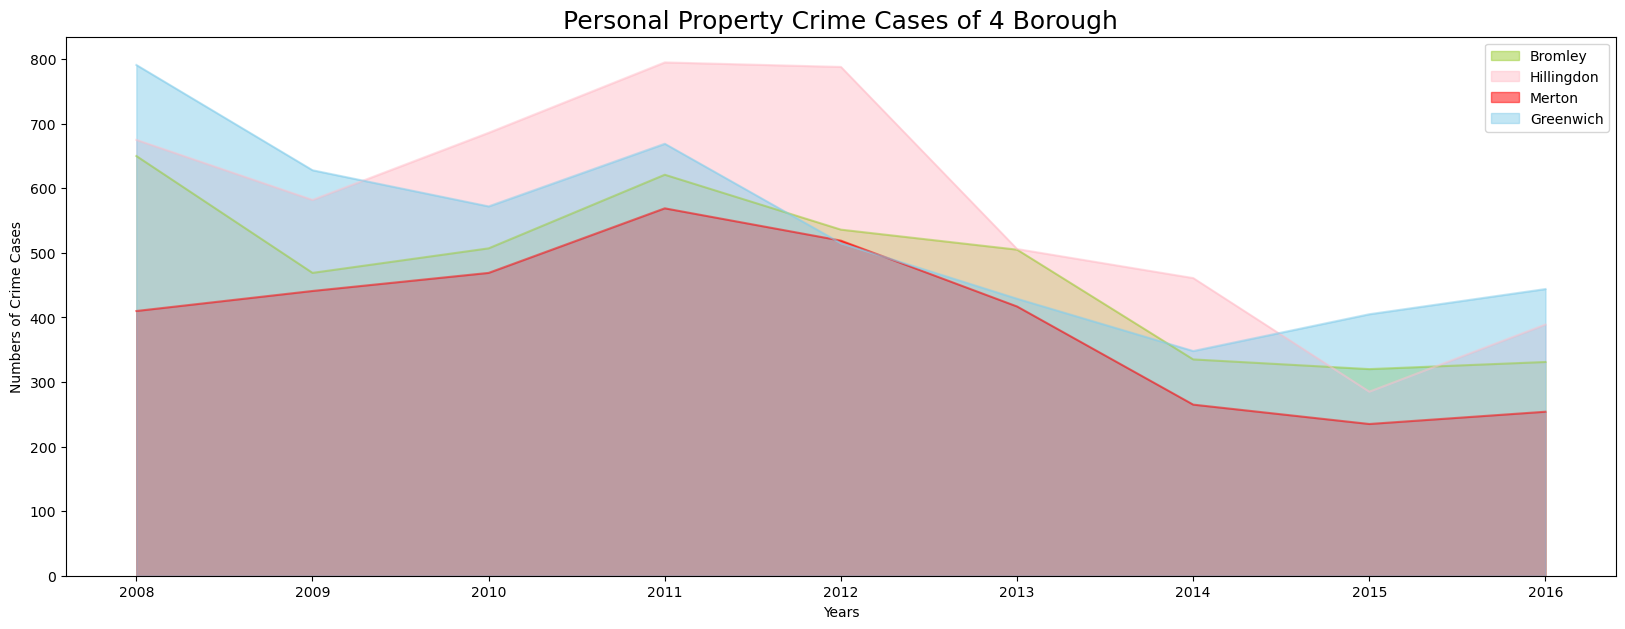

In [22]:
df_4_borough.plot(kind='area',alpha= 0.5, stacked=False,figsize=(20,7),color=['yellowgreen','pink','red','skyblue'])
plt.title('Personal Property Crime Cases of 4 Borough',fontsize=18)
plt.ylabel('Numbers of Crime Cases')
plt.xlabel('Years')
plt.show()

**Interpretasi:**

Berdasarkan area plot "Personal Property Crime Cases of 4 Borough" tedapat perbedaan trend jumlah kasus kejahatan Personal Property pada 4 Borough. Wilayah Merton merupakan wilayah dengan jumlah kasus kejahatan Personal Property paling sedikit dibandingkan dengan wilayah lain yaitu wilayah Bromley, Hillingdon, dan Greenwich.

### Histogram

Histogram adalah salah satu jenis visualisasi data yang bertujuan untuk merepresentasikan distribusi dari sebuah data berupa deretan batang yang berdampingan. Tinggi dari batang menandakan banyaknya data dalam selang nilai. Histogram dapat digunakan untuk mengetahui informasi mengenai ukuran pemusatan dan penyebaran data, mengetahui pola sebaran data, mengidentifikasi outlier, dan lain-lain.

#### Case 4

Ingin diketahui frekuensi munculnya kasus kejahatan kategori Robbery di wilayah Havering pada tahun 2008 - 2016 menggunakan Histogram.

Untuk dapat menjawab permasalahan tersebut, perlu dilakukan preparasi data terlebih dahulu dengan slicing menggunakan .loc pada dataframe london_crimes berdasarkan kolom borough dengan syarat Havering dan kolom major_category dengan syarat Drugs. Kode groupby.('year').sum() menandakan bahwa data dikelompokkan berdasarkan tahun kemudian seluruh data yang telah dikelompokkan dijumlahkan.

In [23]:
df_robbery = london_crimes.loc[(london_crimes['borough']=='Havering') & (london_crimes['major_category']=='Drugs')].groupby('year').sum()
df_robbery

,value,month
year,,
2008,1016,23556
2009,928,23556
2010,989,23556
2011,1011,23556
2012,1049,23556
2013,1006,23556
2014,749,23556
2015,705,23556
2016,718,23556


Kolom month tidak diperlukan, maka dilakukan drop kolom/hapus kolom menggunakan kode .drop('month',axis=1). Kode axis=1 menandakan akan terjadi drop kolom month secara keseluruhan.

In [24]:
robbery_havering = df_robbery.drop('month',axis=1)
robbery_havering

,value
year,
2008,1016
2009,928
2010,989
2011,1011
2012,1049
2013,1006
2014,749
2015,705
2016,718


Sebelum membuat histogram, dapat diketahui berapakah data yang akan dibadi menjadi beberapa interval meggunakan kode np.histogram().
* count : frekuensi
* bin_edges : interval bin

Secara default, data akan dipecah menjadi 10 bin.

In [25]:
count,bin_edges = np.histogram(robbery_havering)
print(count)
print(bin_edges)

[2 1 0 0 0 0 1 0 3 2]
[ 705.   739.4  773.8  808.2  842.6  877.   911.4  945.8  980.2 1014.6
 1049. ]


Langkah selanjutnya adalah membuat area plot menggunakan kode .plot() dengan rincian sebagai berikut:

* kind='' : digunakan untuk mendefinsikan atau menentukan jenis chat yang akan digunakan, pada kasus ini **hist**
* figsize=() : digunakan untuk mengatur ukuran dari chart
* color='' : digunakan untuk memberikan warna tertentu pada chart
* edgecolor'' : digunakan untuk memberikan border warna pada chart

Selain itu, chart dapat diberikan informasi tambahan berupa judul dan nama/keterangan masing-masing sumbu.

* plt.title : digunakan untuk menambahkan judul chart
* plt.ylabel : digunakan untuk memberikan nama/keterangan pada sumbu Y
* plt.xlabel : digunakan untuk memberikan nama/keterangan pada sumbu X
* fontsize : digunakan untuk mengatur ukuran teks
* plt.show() : digunakan untuk menampilkan informasi tambahan

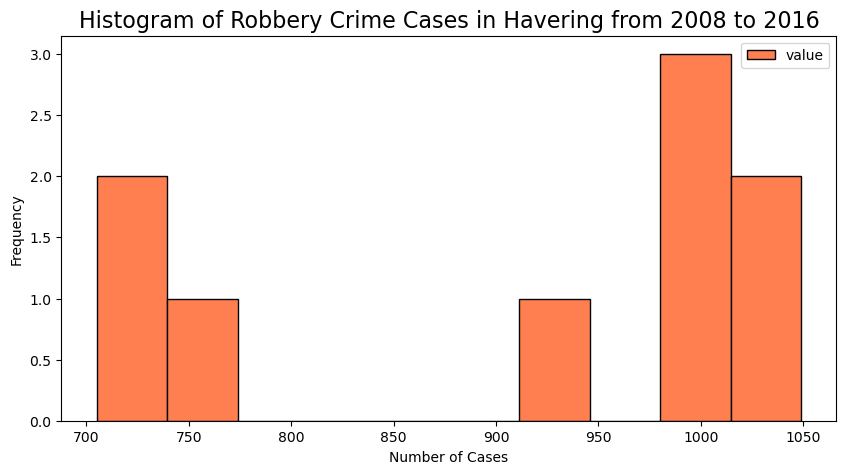

In [26]:
robbery_havering.plot(kind='hist',figsize=(10,5),color='coral',edgecolor='black')
plt.title('Histogram of Robbery Crime Cases in Havering from 2008 to 2016',fontsize=16)
plt.ylabel('Frequency')
plt.xlabel('Number of Cases')
plt.show()

**Interpretasi:**

Berdasarkan histogram "Histogram of Robbery Crime Cases in Havering from 2008 to 2016" dapat diketahui bahwa jumlah kasus kejahatan Drugs pada wilayah Havering tertinggi berada pada interval 950 - 1050 yaitu sebanyak 5 kasus selama tahun 2008 - 2016. Sedangkan jumlah kasus kejahatan Drugs pada wilayah Havering terdendah berada pada interval 800 - 900 yaitu sebanyak 0 kasus. Pada interval 700 - 800 terdapat sebanyak 3 kasus dan pada interval 900 - 950 terdapat 1 kasus.

### Bar Chart

Bar Chart atau diagram batang adalah salah satu bentuk visualisasi data yang bertujuan untuk merepresentasikan jumlah data dari suatu kategori tertentu.

#### Case 5

Menggunakan bar chart, tunjukkan total setiap kasus kejahatan major (mayor_category) yang terjadi di London dari tahun 2008 - 2016, serta kasus manakah yang paling banyak terjadi di London pada jangka waktu tersebut?

Untuk dapat menjawab permasalahan tersebut, perlu dilakukan preparasi data terlebih dahulu dengan cara mengelompokkan kolom major_category menggunakan kode groupby.('major_category') kemudian seluruh data yang telah dikelompokkan dijumlahkan menggunakan kode .sum().

In [27]:
london_crimes.groupby('major_category').sum()

,value,year,month
major_category,,,
Burglary,754293,2099731248,6783426
Criminal Damage,630938,4163174064,13449618
Drugs,470765,2373089616,7666542
Fraud or Forgery,5325,475878240,1537380
Other Notifiable Offences,106349,1561923648,5045976
Robbery,258873,1890040608,6105996
Sexual Offences,1273,217513296,702702
Theft and Handling,2661861,7980195600,25780950
Violence Against the Person,1558081,6381548928,20616336


Kolom year dan month tidak diperlukan, maka dilakukan drop kolom/hapus kolom menggunakan kode .drop(['year', month'],axis=1). Kode axis=1 menandakan akan terjadi drop kolom year dan month secara keseluruhan.

In [28]:
major_case = london_crimes.groupby('major_category').sum().drop(['year','month'],axis=1)
major_case

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


Langkah selanjutnya adalah membuat area plot menggunakan kode .plot() dengan rincian sebagai berikut:

* kind='' : digunakan untuk mendefinsikan atau menentukan jenis chat yang akan digunakan, pada kasus ini **barh** (bar chart horizontal)
* figsize=() : digunakan untuk mengatur ukuran dari chart
* color='' : digunakan untuk memberikan warna tertentu pada chart
* edgecolor'' : digunakan untuk memberikan border warna pada chart

Selain itu, chart dapat diberikan informasi tambahan berupa judul dan nama/keterangan masing-masing sumbu.

* plt.title() : digunakan untuk menambahkan judul chart
* plt.ylabel() : digunakan untuk memberikan nama/keterangan pada sumbu Y
* plt.xlabel() : digunakan untuk memberikan nama/keterangan pada sumbu X
* fontsize : digunakan untuk mengatur ukuran teks
* plt.show() : digunakan untuk menampilkan informasi tambahan

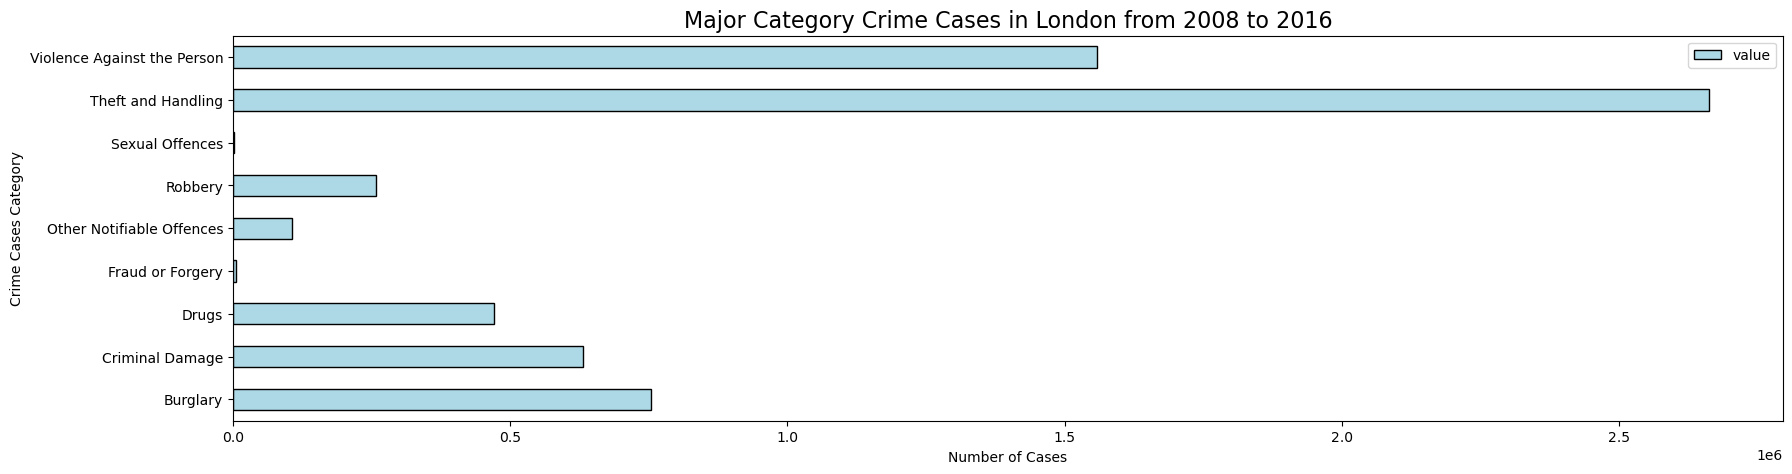

In [29]:
major_case.plot(kind='barh',figsize=(20,5),color='lightblue',edgecolor='black')
plt.title('Major Category Crime Cases in London from 2008 to 2016',fontsize=16)
plt.xlabel('Number of Cases')
plt.ylabel('Crime Cases Category')
plt.show()

**Interpretasi:**

Berdasarkan bar chart "Major Category Crime Cases in London from 2008 to 2016" dapat diketahu bahwa jumlah kasus kejahatan major_category yang paling banyak terjadi adalah kasus kejahatan Theft and Handling dan yang paling sedikit terjadi adalah kasus kejahatan Sexual Offences. 

Secara berurutan, kasus kejahatan dari yang tertinggi hingga terendah adalah Theft and Handling, Violence Against the Person, Burglary, Criminal Damage, Drugs, Robbery, Other Notifiable Offences, Fraud or Forgery, dan Sexual Offences.

Catatan: Pada bar charts, jumlah frekuensi kasus adalah value/1000000.

#### Case 6

Menggunakan bar chart, tunjukkan total setiap kasus kejahatan minor (minor_category) yang terjadi di London dari tahun 2008 - 2016, serta kasus manakah yang paling banyak terjadi di London pada jangka waktu tersebut?

Untuk dapat menjawab permasalahan tersebut, perlu dilakukan preparasi data terlebih dahulu dengan cara mengelompokkan kolom minor_category menggunakan kode groupby.('minor_category') kemudian seluruh data yang telah dikelompokkan dijumlahkan menggunakan kode .sum().

In [30]:
london_crimes.groupby('minor_category').sum()

,value,year,month
minor_category,,,
Assault with Injury,451001,1049974272,3392064
Burglary in Other Buildings,263011,1050408864,3393468
Burglary in a Dwelling,491282,1049322384,3389958
Business Property,21295,842456592,2721654
Common Assault,413690,1050626160,3394170
Counted per Victim,3840,277486992,896454
Criminal Damage To Dwelling,154116,1049105088,3389256
Criminal Damage To Motor Vehicle,265463,1050191568,3392766
Criminal Damage To Other Building,66003,1013903136,3275532


Kolom year dan month tidak diperlukan, maka dilakukan drop kolom/hapus kolom menggunakan kode .drop(['year', month'],axis=1). Kode axis=1 menandakan akan terjadi drop kolom year dan month secara keseluruhan.

In [31]:
minor_case = london_crimes.groupby('minor_category').sum().drop(['year','month'],axis=1)
minor_case

,value
minor_category,
Assault with Injury,451001
Burglary in Other Buildings,263011
Burglary in a Dwelling,491282
Business Property,21295
Common Assault,413690
Counted per Victim,3840
Criminal Damage To Dwelling,154116
Criminal Damage To Motor Vehicle,265463
Criminal Damage To Other Building,66003


Langkah selanjutnya adalah membuat area plot menggunakan kode .plot() dengan rincian sebagai berikut:

* kind='' : digunakan untuk mendefinsikan atau menentukan jenis chat yang akan digunakan, pada kasus ini **barh** (bar chart horizontal)
* figsize=() : digunakan untuk mengatur ukuran dari chart
* color='' : digunakan untuk memberikan warna tertentu pada chart
* edgecolor'' : digunakan untuk memberikan border warna pada chart

Selain itu, chart dapat diberikan informasi tambahan berupa judul dan nama/keterangan masing-masing sumbu.

* plt.title() : digunakan untuk menambahkan judul chart
* plt.ylabel() : digunakan untuk memberikan nama/keterangan pada sumbu Y
* plt.xlabel() : digunakan untuk memberikan nama/keterangan pada sumbu X
* fontsize : digunakan untuk mengatur ukuran teks
* plt.show() : digunakan untuk menampilkan informasi tambahan

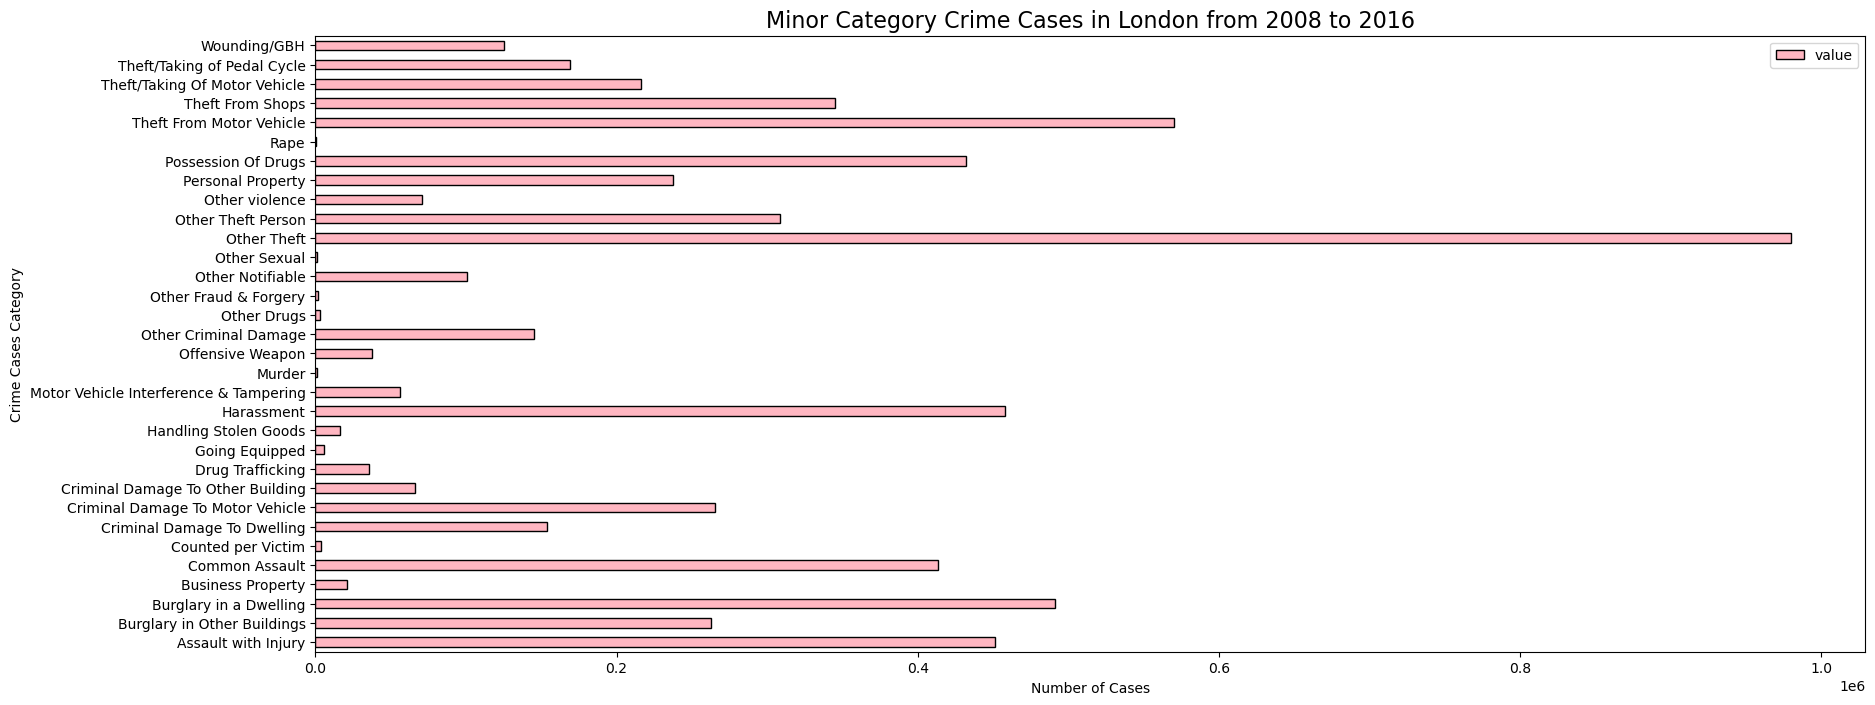

In [32]:
minor_case.plot(kind='barh',figsize=(20,8),color='lightpink',edgecolor='black')
plt.title('Minor Category Crime Cases in London from 2008 to 2016',fontsize=16)
plt.xlabel('Number of Cases')
plt.ylabel('Crime Cases Category')
plt.show()

**Interpretasi:**

Berdasarkan bar chart "Minor Category Crime Cases in London from 2008 to 2016" dapat diketahu bahwa jumlah kasus kejahatan major_category yang paling banyak terjadi adalah kasus kejahatan Other Theft dan yang paling sedikit terjadi adalah kasus kejahatan Rape. 

Catatan: Pada bar charts, jumlah frekuensi kasus adalah value/1000000.

### Pie Chart

Pie chart atau diagram lingkaran berujuan untuk membandingkan setiap kategori pada data secara keseluruhan. Pie chart akan lebih efisien apabila kategori data yang digunakan jumlahnya tidak terlalu banyak.

#### Case 7

Menggunakan Pie Chart, tunjukkan presentase kasus kejahatan di London dikelompokkan berdasarkan tahun pada tahun 2008 - 2016. Wilayah manakah yang memiliki presentase kasus kejahatan tertinggi dan terendah?

Untuk dapat menjawab permasalahan tersebut, perlu dilakukan preparasi data terlebih dahulu dengan cara mengelompokkan data berdasarkan tahun menggunakan kode groupby.('year') kemudian seluruh data yang telah dikelompokkan dijumlahkan menggunakan kode .sum().

In [33]:
london_crimes.groupby('year').sum()

,value,month
year,,
2008,738641,9743214
2009,717214,9743214
2010,715324,9743214
2011,724915,9743214
2012,737329,9743214
2013,686407,9743214
2014,680183,9743214
2015,711624,9743214
2016,736121,9743214


Kolom year dan month tidak diperlukan, maka dilakukan drop kolom/hapus kolom menggunakan kode .drop('month',axis=1). Kode axis=1 menandakan akan terjadi drop kolom month secara keseluruhan.

In [34]:
df_years = london_crimes.groupby('year').sum().drop('month',axis=1)
df_years

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


Langkah selanjutnya adalah membuat area plot menggunakan kode .plot() dengan rincian sebagai berikut:

* kind='' : digunakan untuk mendefinsikan atau menentukan jenis chat yang akan digunakan, pada kasus ini **pie**
* figsize=() : digunakan untuk mengatur ukuran dari chart
* autopct='' : digunakan untuk menambahkan presentase
* startangle= : digunakan untuk menentukan awal angle yang digunakan
* shadow= : dugunakan untuk menambahkan bayangan pada chart
* labels= : menambahkan label pada chart
* pctdistance= : digunakan untuk mengatur rasio diantara setiap slice pada pie chart
* colors='' : digunakan untuk memberikan warna tertentu pada chart
* explode='' : digunakan untuk memberikan jarak pada masing-masing slice pada chart

Selain itu, chart dapat diberikan informasi tambahan berupa judul dan nama/keterangan masing-masing sumbu.

* plt.legend() : digunakan untuk menambahkan legend pada chart dengan lokasi yang diinginkan
* plt.axis() : digunakan agar lingkaran center
* plt.title() : digunakan untuk menambahkan judul chart
* fontsize : digunakan untuk mengatur ukuran teks
* y : digunakan untuk meninggikan judul jika overlap dengan teks pada chart
* plt.show() : digunakan untuk menampilkan informasi tambahan

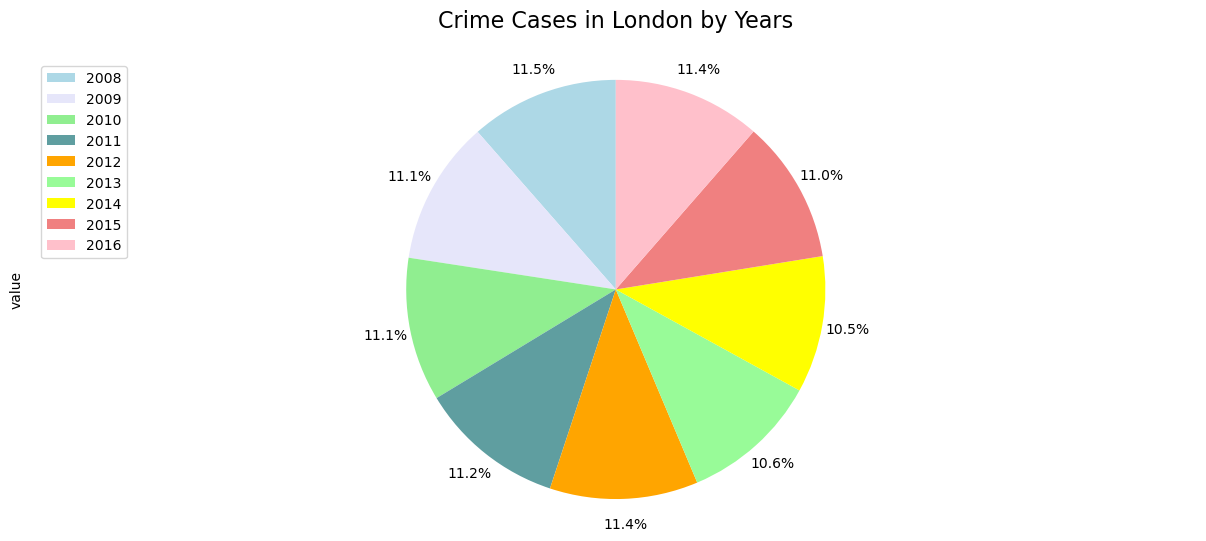

In [35]:
color_list = ['lightblue','lavender','lightgreen','cadetblue','orange','palegreen','yellow','lightcoral','pink']
explode_list = [0,0,0,0,0,0,0,0,0]

df_years['value'].plot(kind='pie',
              figsize=(15,6),
              autopct='%1.1f%%',
              startangle=90,
              shadow=False,
              labels=None,
              pctdistance=1.12,
              colors=color_list,
              explode=explode_list)

plt.legend(labels=df_years.index,loc='upper left')
plt.axis('equal')
plt.title('Crime Cases in London by Years', fontsize=16, y=1.05)
plt.show()

**Interpretasi:**

Berdasarkan pie chart "Crime Cases in London by Years" kasus kejahatan di London selama tahun 2008 - 2016 paling banyak terjadi di tahun 2008 yaitu sebesar 11.5% dan paling sedikit terjadi pada tahun 2014 yaitu sebesar 10.5%

### Box Plot

Boxplot atau diagram kotak garis adalah sebuah diagram yang bertujuan untuk menampilkan ringkasan dari distribusi sebuah data sehingga dapat diketahui skewness atau kemiringan dari sebuah data. Pada box plot terdapat 5 ukuran statistik yang digunakan yaitu nilai minimum, Q1, Q2, Q3 dan nilai maksimum. Boxplot dapat juga digunakan untuk mendeteksi outlier dari sebuah data.

#### Case 8

Menggunakan Box Plot, bandingkan kasus kejahatan kategori minor Common Assault di London pada wilayah Ealing dan Newham tahun 2008 - 2016.

Untuk menjawab permasalahan tersebut perlu dilakukan preparasi data terlebih dahulu dengan cara slicing menggunakan .loc berdasarkan kolom borough dengan syarat Ealing dan kolom minor_category dengan syarat Common Assault. Kode groupby.('year').sum() menandakan bahwa data dikelompokkan berdasarkan tahun kemudian seluruh data yang telah dikelompokkan dijumlahkan.

In [36]:
ealing_case = london_crimes.loc[(london_crimes['borough']=='Ealing') & (london_crimes['minor_category']=='Common Assault')].groupby('year').sum()
ealing_case

,value,month
year,,
2008,1607,15288
2009,1745,15288
2010,2065,15288
2011,2119,15288
2012,1834,15288
2013,1559,15288
2014,2120,15288
2015,2662,15288
2016,2887,15288


Kolom month tidak diperlukan, maka dilakukan drop kolom/hapus kolom menggunakan kode .drop('month',axis=1). Kode axis=1 menandakan akan terjadi drop kolom month secara keseluruhan. Untuk mengubah nama kolom, dapat menggunakan kode rename(columns={"value":"Ealing"}) yang berarti mengubah nama kolom **value** menjadi **Ealing**.

In [37]:
CA_ealing = ealing_case.drop('month',axis=1).rename(columns={'value':'Ealing'})
CA_ealing

,Ealing
year,
2008,1607
2009,1745
2010,2065
2011,2119
2012,1834
2013,1559
2014,2120
2015,2662
2016,2887


Untuk menjawab permasalahan tersebut perlu dilakukan preparasi data terlebih dahulu dengan cara slicing menggunakan .loc berdasarkan kolom borough dengan syarat Newham dan kolom minor_category dengan syarat Common Assault. Kode groupby.('year').sum() menandakan bahwa data dikelompokkan berdasarkan tahun kemudian seluruh data yang telah dikelompokkan dijumlahkan.

In [38]:
newham_case = london_crimes.loc[(london_crimes['borough']=='Newham') & (london_crimes['minor_category']=='Common Assault')].groupby('year').sum()
newham_case

,value,month
year,,
2008,1853,12792
2009,2064,12792
2010,2130,12792
2011,1973,12792
2012,2030,12792
2013,1867,12792
2014,2387,12792
2015,2734,12792
2016,2748,12792


Kolom month tidak diperlukan, maka dilakukan drop kolom/hapus kolom menggunakan kode .drop('month',axis=1). Kode axis=1 menandakan akan terjadi drop kolom month secara keseluruhan. Untuk mengubah nama kolom, dapat menggunakan kode rename(columns={'value':'Ealing'}) yang berarti mengubah nama kolom **value** menjadi **Newham**.

In [39]:
CA_newham = newham_case.drop('month',axis=1).rename(columns={'value':'Newham'})
CA_newham

,Newham
year,
2008,1853
2009,2064
2010,2130
2011,1973
2012,2030
2013,1867
2014,2387
2015,2734
2016,2748


Data dari masing-masing tabel/dataframe bernama CA_Ealing dan CA_newham akan disatukan atau merge menggunakan kode pd.concat.

In [40]:
ealing_newham = pd.concat ([CA_ealing, CA_newham],axis=1)
ealing_newham

,Ealing,Newham
year,,
2008,1607,1853
2009,1745,2064
2010,2065,2130
2011,2119,1973
2012,1834,2030
2013,1559,1867
2014,2120,2387
2015,2662,2734
2016,2887,2748


Langkah selanjutnya adalah membuat area plot menggunakan kode .plot() dengan rincian sebagai berikut:

* kind='' : digunakan untuk mendefinsikan atau menentukan jenis chat yang akan digunakan, pada kasus ini **box**
* figsize=() : digunakan untuk mengatur ukuran dari chart

Selain itu, chart dapat diberikan informasi tambahan berupa judul dan nama/keterangan masing-masing sumbu.

* plt.title() : digunakan untuk menambahkan judul chart
* plt.ylabel() : digunakan untuk memberikan nama/keterangan pada sumbu Y
* plt.xlabel() : digunakan untuk memberikan nama/keterangan pada sumbu X
* fontsize : digunakan untuk mengatur ukuran teks
* plt.show() : digunakan untuk menampilkan informasi tambahan

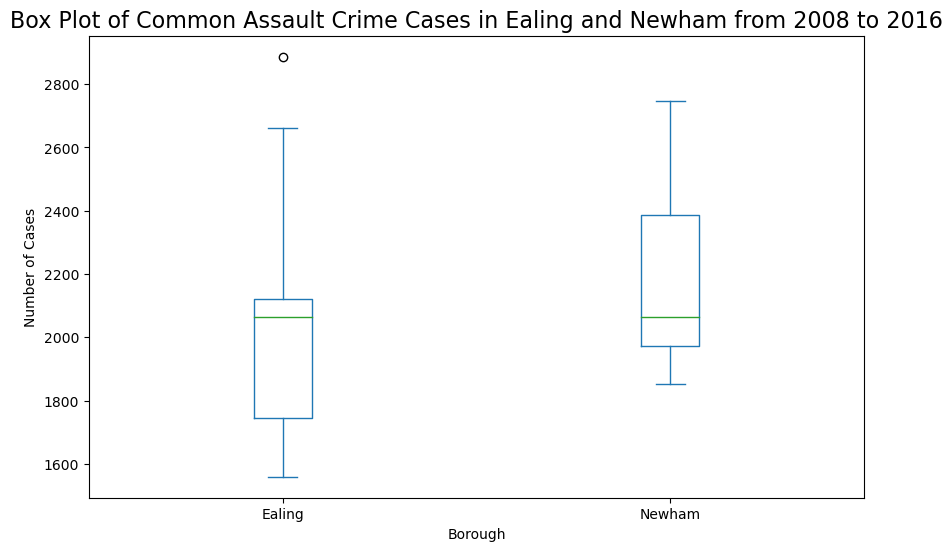

In [41]:
ealing_newham.plot(kind='box',
                   figsize=(10,6))
plt.title('Box Plot of Common Assault Crime Cases in Ealing and Newham from 2008 to 2016',fontsize=16)
plt.ylabel('Number of Cases')
plt.xlabel('Borough')
plt.show()

**Interpretasi:**

Berdasarkan boxplot "Box Plot of Common Assault Crime Cases in Ealing and Newham from 2008 to 2016" pada wilayah Ealing dapat didapatkan beberapa informasi sebagai berikut:
* Jumlah kasus kejahatan minimum di wilayah Ealing bernilai kurang dari 1600 kasus yaitu 1559 kasus
* Jumlah kasus kejahatan maksimum di wilayah Ealing bernilai lebih dari 2600 kasus yaitu 2887 kasus
* Pada distribusi data kasus kejahatan di wilayah Ealing terdapat satu nilai outlier/pencilan
* Besar nilai kuartil pertama dari kasus kejahatan di wilayah Ealing adalah kurang dari 1800 kasus
* Besar nilai kuartil kedua/median dari kasus kejahatan di wilayah Ealing adalah antara 2000 - 2200 kasus
* Besar nilai kuartil ketiga dari kasus kejahatan di wilayah Ealing adalah lebih dari 2000 kasus
* Distribusi data tidak simetris

Berdasarkan boxplot "Box Plot of Common Assault Crime Cases in Ealing and Newham from 2008 to 2016" pada wilayah Newham dapat didapatkan beberapa informasi sebagai berikut:
* Jumlah kasus kejahatan minimum di wilayah Newham bernilai kurang dari 2000 kasus dan tidak lebih dari 2000 kasus yaitu 1853 kasus
* Jumlah kasus kejahatan maksimum di wilayah Newham bernilai lebih dari 2600 kasus yaitu 2748 kasus
* Pada distribusi data kasus kejahatan di wilayah Newham tidak terdapat satu nilai outlier/pencilan
* Besar nilai kuartil pertama dari kasus kejahatan di wilayah Newham adalah kurang dari 2000 kasus
* Besar nilai kuartil kedua/median dari kasus kejahatan di wilayah Newham adalah antara 2000 - 2200 kasus
* Besar nilai kuartil ketiga dari kasus kejahatan di wilayah Newham adalah lebih dari 2200 kasus
* Distribusi data tidak simetris

### Scatter Plot

Scatter plot atau diagram pencar adalah salah satu bentuk visualisasi data yang bertujuan untuk membandingkan variabel.

#### Case 8

Menggunakan scatter plot, visualisasikan tren jumlah kasus kejahatan di London selama tahun 2008 - 2016.

Untuk dapat menjawab permasalahan tersebut, perlu dilakukan preparasi data terlebih dahulu dengan cara mengelompokkan data berdasarkan tahun menggunakan kode groupby.('year') kemudian seluruh data yang telah dikelompokkan dijumlahkan menggunakan kode .sum().

In [42]:
london_crimes.groupby('year').sum()

,value,month
year,,
2008,738641,9743214
2009,717214,9743214
2010,715324,9743214
2011,724915,9743214
2012,737329,9743214
2013,686407,9743214
2014,680183,9743214
2015,711624,9743214
2016,736121,9743214


Kolom year dan month tidak diperlukan, maka dilakukan drop kolom/hapus kolom menggunakan kode .drop('month',axis=1). Kode axis=1 menandakan akan terjadi drop kolom month secara keseluruhan.

In [43]:
df_crimes = london_crimes.groupby('year').sum().drop('month',axis=1)
df_crimes

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


Agar years menjadi sebuah value/nilai, maka dilakukan reset index year menggunakan kode .reset_index()

In [44]:
df_crimes_year = df_crimes.reset_index()
df_crimes_year

,year,value
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


Langkah selanjutnya adalah membuat area plot menggunakan kode .plot() dengan rincian sebagai berikut:

* kind='' : digunakan untuk mendefinsikan atau menentukan jenis chat yang akan digunakan, pada kasus ini **scatter**
* x : digunakan untuk nilai sumbu x
* y : digunakan untuk nilai sumbu y
* figsize=() : digunakan untuk mengatur ukuran dari chart
* colors='' : digunakan untuk memberikan warna tertentu pada chart

Selain itu, chart dapat diberikan informasi tambahan berupa judul dan nama/keterangan masing-masing sumbu.

* plt.title() : digunakan untuk menambahkan judul chart
* plt.ylabel() : digunakan untuk memberikan nama/keterangan pada sumbu Y
* plt.xlabel() : digunakan untuk memberikan nama/keterangan pada sumbu X
* fontsize : digunakan untuk mengatur ukuran teks
* plt.show() : digunakan untuk menampilkan informasi tambahan

Text(0.5, 0, 'Years')

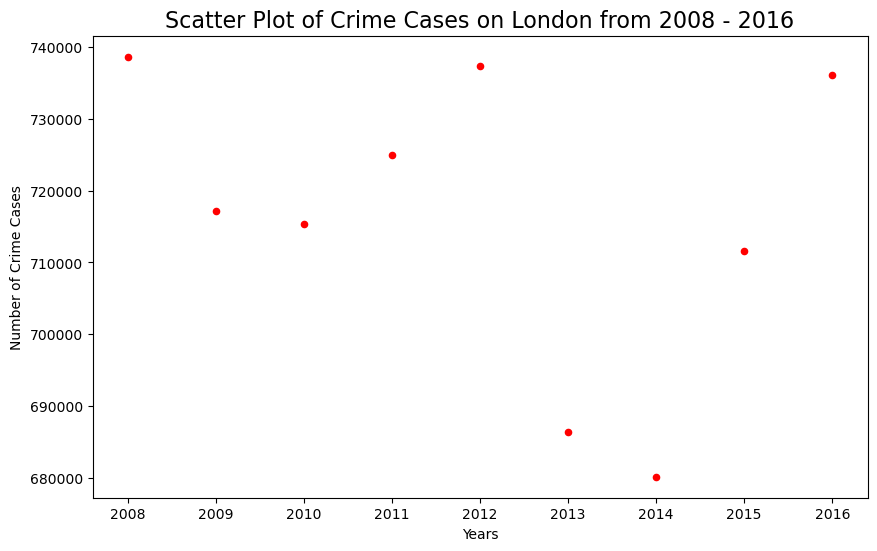

In [45]:
df_crimes_year.plot(kind='scatter',x='year',y='value',figsize=(10,6),color='red')
plt.title('Scatter Plot of Crime Cases on London from 2008 - 2016',fontsize=16)
plt.ylabel('Number of Crime Cases')
plt.xlabel('Years')

**Interpretasi:**

Berdasarkan scatter plot "Scatter Plot of Crime Cases on London from 2008 - 2016" pola sebaran data tidak menunjukkan trend tertentu.

### Word Clouds

Word clouds biasanya digunakan untuk memvisualisasikan data teks.

Sebelum melakukan visualisasi menggunakan word clouds, perlu dilakukan install package menggunakan kode !pip install wordcloud, setelah itu dilakukan import package menggunakan kode from wordcloud import WordCloud.

In [46]:
from wordcloud import WordCloud

#### Case 9

Menggunakan word clouds, ingin diketahui seberapa besar kontribusi wilayah terhadap kasus kejahatan di London pada tahun 2008 - 2016

Untuk dapat menjawab permasalahan tersebut, perlu dilakukan preparasi data terlebih dahulu dengan cara mengelompokkan data berdasarkan wilayah/borough menggunakan kode groupby.('borough') kemudian seluruh data yang telah dikelompokkan dijumlahkan menggunakan kode .sum().

In [47]:
london_crimes.groupby('borough').sum()

,value,year,month
borough,,,
Barking and Dagenham,149447,625812480,2021760
Barnet,212191,1152537984,3723408
Bexley,114136,775964016,2506842
Brent,227551,987175728,3189186
Bromley,184349,1054102896,3405402
Camden,275147,761405184,2459808
City of London,780,19556640,63180
Croydon,260294,1211425200,3913650
Ealing,251562,1105384752,3571074


Kolom year dan month tidak diperlukan, maka dilakukan drop kolom/hapus kolom menggunakan kode .drop('month',axis=1). Kode axis=1 menandakan akan terjadi drop kolom month secara keseluruhan.

In [48]:
wordclouds = london_crimes.groupby('borough').sum().drop(['year','month'],axis=1)
wordclouds

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


Dilakukan pengecekan index data menggunakan kode .index.

In [49]:
wordclouds.index

Index(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
       'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype='object', name='borough')

Menghitung total kasus kejahatan yang terjadi.

In [50]:
total_cases = wordclouds['value'].sum()
total_cases

6447758

Duplikat nama masing-masing wilayah berdasarkan seberapa besar kontribusi wilayah tersebut terhadap total kasus kejahatan di London.

In [52]:
max_words = 100
word_string = ''
for borough in wordclouds.index.values:
    if len(borough.join(' ')) == 1:
        repeat_num_ties = int(wordclouds.loc[borough,"value"]/float(total_cases)*max_words)
        word_string = word_string + ((borough + ' ') * repeat_num_ties)
        
word_string

'Barking and Dagenham Barking and Dagenham Barnet Barnet Barnet Bexley Brent Brent Brent Bromley Bromley Camden Camden Camden Camden Croydon Croydon Croydon Croydon Ealing Ealing Ealing Enfield Enfield Enfield Greenwich Greenwich Hackney Hackney Hackney Hammersmith and Fulham Hammersmith and Fulham Haringey Haringey Haringey Harrow Havering Havering Hillingdon Hillingdon Hillingdon Hounslow Hounslow Islington Islington Islington Kensington and Chelsea Kensington and Chelsea Kingston upon Thames Lambeth Lambeth Lambeth Lambeth Lewisham Lewisham Lewisham Merton Newham Newham Newham Newham Redbridge Redbridge Richmond upon Thames Southwark Southwark Southwark Southwark Sutton Tower Hamlets Tower Hamlets Tower Hamlets Waltham Forest Waltham Forest Waltham Forest Wandsworth Wandsworth Wandsworth Westminster Westminster Westminster Westminster Westminster Westminster Westminster '

Membuat wordcloud menggunakan kode WordCloud dengan warna latar putih.

In [53]:
wordcloud = WordCloud(background_color='white').generate(word_string)

Menampilkan wordcloud dengan ukuran x = 14 dan y = 18

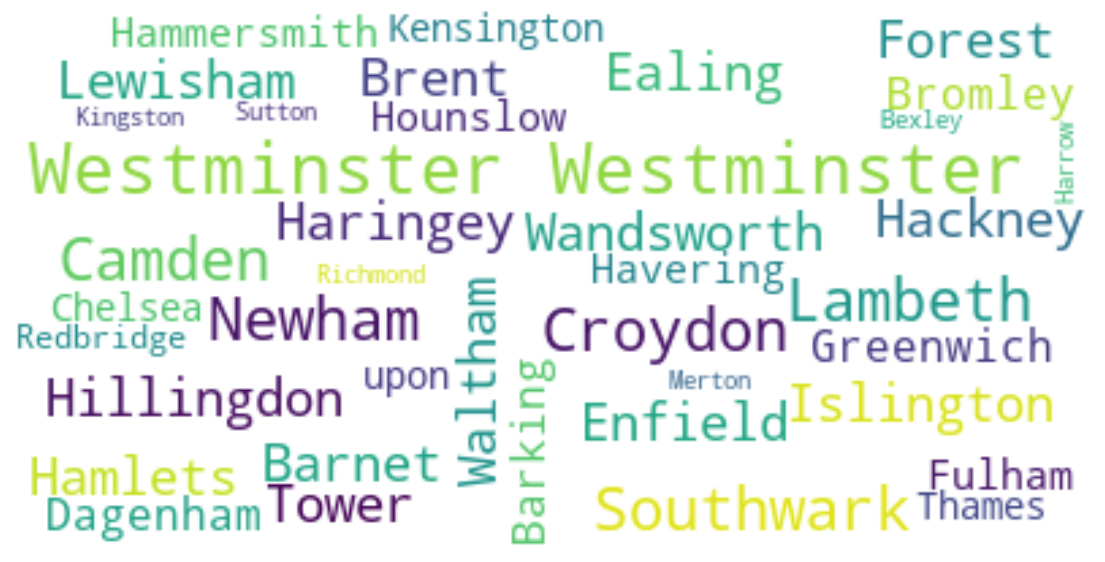

In [54]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Interpretasi:**

Berdasarkan word cloud, wilayah yang paling berkontribusi terhadap total kasus kejahatan di London adalah Westminster, hal ini ditandai dengan ukuran teks yang besar diantara yang lainnya. Wilayah lainnya yang juga berkontribusi tinggi terhadap kasus kejahatan di London adalah Lambeth, Newham, Camden, dan Southwark.

### Folium Maps

Folium adalah salah satu library yang disediakan bahasa pemrograman Phyton dan berguna apabila pengguna ingin membuat peta.

Library Folium dapat diinstal menggunakan kode !pip install folium. Setelah diinstal, maka dapat dilakukan pengimporan dengan kode import folium.

In [55]:
import folium

#### Case 10

Menggunakan folium maps, tunjukkan 10 wilayah teratas kasus kejahatan di London selama tahun 2008 hingga 2016.

Untuk dapat menjawab permasalahan tersebut, perlu dilakukan preparasi data terlebih dahulu dengan cara mengelompokkan data berdasarkan wilayah menggunakan kode groupby.('borough') kemudian seluruh data yang telah dikelompokkan dijumlahkan menggunakan kode .sum().

In [57]:
london_crimes.groupby('borough').sum()

,value,year,month
borough,,,
Barking and Dagenham,149447,625812480,2021760
Barnet,212191,1152537984,3723408
Bexley,114136,775964016,2506842
Brent,227551,987175728,3189186
Bromley,184349,1054102896,3405402
Camden,275147,761405184,2459808
City of London,780,19556640,63180
Croydon,260294,1211425200,3913650
Ealing,251562,1105384752,3571074


Karena data yang dibutuhkan hanya data 10 wilayah dengan kasus kejahatan tertinggi, maka digunakan kode .sort_values('value',ascending=False) untuk mengurutkan data dari yang tertinggi menuju terendah dan kode .head(10) untuk mengambil 10 data teratas tersebut.

In [58]:
borough_crimes_10 = london_crimes.groupby('borough').sum().sort_values('value',ascending=False).head(10)
borough_crimes_10

,value,year,month
borough,,,
Westminster,455028,737719920,2383290
Lambeth,292178,1044324576,3373812
Southwark,278809,972399600,3141450
Camden,275147,761405184,2459808
Newham,262024,948497040,3064230
Croydon,260294,1211425200,3913650
Ealing,251562,1105384752,3571074
Islington,230286,722726496,2334852
Tower Hamlets,228613,829201536,2678832


Kolom year dan month dan year tidak diperlukan, maka dilakukan drop kolom/hapus kolom menggunakan kode .drop(['month','year'],axis=1). Kode axis=1 menandakan akan terjadi drop kolom month secara keseluruhan.

In [63]:
borough_crimes = borough_crimes_10.drop(['month','year'],axis=1)
borough_crimes

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024
Croydon,260294
Ealing,251562
Islington,230286
Tower Hamlets,228613


Pada data, informasi mengenai latitude dan longitude masing-masing wilayah tidak tersedia. Perlu dilakukan penambahan informasi mengenai latitude dan longitude masing-masing wilayah.
* X_lat = latitude masing-masing wilayah
* Y_lon = longitude masing-masing wilayah

In [64]:
X_lat = [51.494720,51.503324,51.502781,51.5290,51.536388,51.376495,51.51216,51.546506,51.512643,51.5672808]
Y_lon = [-0.135278,-0.119543,-0.087738,-0.1255,0.035216,-0.100594,-0.301939, -0.105806,-0.033385,-0.2710568]

Setelah informasi mengenai latitude dan longitude masing-masing wilayah tersedia, hal yang perlu dilakukan adalah menggabungkan dataframe yang berisikan informasi tambahan dengan dataframe yang berisikan jumlah kasus kejahatan pada masing-masing wilayah.

In [65]:
borough_crimes['X_latitude'] = X_lat
borough_crimes['Y_longitude'] =  Y_lon
borough_crimes

,value,X_latitude,Y_longitude
borough,,,
Westminster,455028,51.494720,-0.135278
Lambeth,292178,51.503324,-0.119543
Southwark,278809,51.502781,-0.087738
Camden,275147,51.529000,-0.125500
Newham,262024,51.536388,0.035216
Croydon,260294,51.376495,-0.100594
Ealing,251562,51.512160,-0.301939
Islington,230286,51.546506,-0.105806
Tower Hamlets,228613,51.512643,-0.033385


Mendefinisikan variabel yang berisikan latitude dan longitude London untuk membuat folium maps London.

In [66]:
lat = 51.509865
lon = -0.118092

Membuat folium maps London menggunakan kode folium.Maps()

* location[] : berisikan latitude dan longitude wilayah yang diinginkan
* zoom_start : digunakan untuk mengatur tingkatan zoom pada map

In [67]:
london_map = folium.Map(location=[lat,lon],zoom_start=10)
london_map

Untuk menandai lokasi kasus kejahatan pada peta, digunakan fitur .FeatureGroup() dan menambahkannya pada london_map.
* radius : digunakan untuk mengatur besarnya penanda/lingkaran yang diinginkan
* color : digunakan untuk memberikan warna tertentu
* fill : digunakan untuk memberikan isi pada lingkaran
* fill_color : digunakan untuk memberikan warna isi
* fill_opacity : digunakan untuk mengatur transparansi warna isi

In [68]:
cases = folium.map.FeatureGroup()

for lat,lon in zip(borough_crimes.X_latitude,borough_crimes.Y_longitude):
    cases.add_child(
        folium.CircleMarker(
            [lat,lon],
            radius=5,
            color='blue',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )
london_map.add_child(cases)